<a href="https://colab.research.google.com/github/vasantbala/vb_ai_course/blob/main/neural_networks/prework/TensorFlow_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand written digits 0-9 

#unpack the dataset to train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


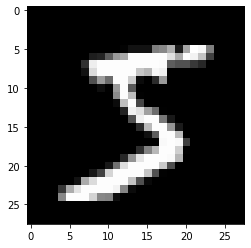

In [2]:
import matplotlib.pyplot as plt
#show image and use gray b/c its a grayscale image
plt.imshow(x_train[0], cmap='gray')

In [3]:
#normalize to scale the values from 0 to 1. This improves the model
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

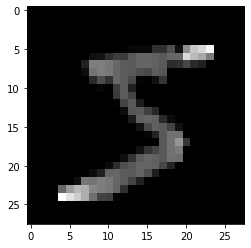

In [4]:
plt.imshow(x_train[0], cmap='gray')

In [5]:
#build model

#choose sequence type (vs ?)
model = tf.keras.models.Sequential()

#input layer
# flatten the layer (convoluted data and we are using for input so simplify it)
model.add(tf.keras.layers.Flatten())

#two hidden layers
#128 neurons; default activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#output layer
#output is classification; so use 10 neurons; probability dist -- softmax
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

#train model
#adam is default goto optimizer and there are other 10 including one for gradient descent

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4574 - accuracy: 0.8733
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1133 - accuracy: 0.9646
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0751 - accuracy: 0.9761


In [6]:
#neural networks are good at overfitting

#calcuate loss on test
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0968 - accuracy: 0.9698
0.09678500145673752 0.9697999954223633


In [7]:
#model.save('epic_num_reader.model')
predictions = model.predict([x_test])


Consider rewriting this model with the Functional API.


In [8]:
import numpy as np

print(np.argmax(predictions[0]))

7


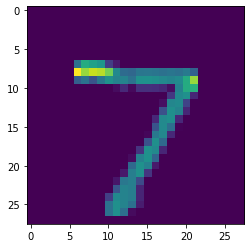

In [9]:
plt.imshow(x_test[0])
plt.show()